### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
import time

In [2]:
# load iris dataset from sklearn
iris = datasets.load_iris()
print(iris.keys())
print(iris.feature_names)
# print(iris.data)
print(iris.target_names)
# print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# set X and y from iris dataset
X = iris.data ### load all features
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
# add intercept
intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept, X_train), axis = 1)
X_test = np.insert(X_test, 0, 1, axis = 1)


assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# print(X_train)
# print(X_test)

(112, 5)
(112,)
(38, 5)
(38,)


In [6]:
## define m, k shapes and initialize y in (m,k) dimension
m = X_train.shape[0]
k = len(set(y))
# print(k)
# print(m)
y_train_encoded = np.zeros((m,k))
for i in range(k):
    index = y_train == i
    y_train_encoded[np.where(index), i] = 1
# print(y_train_encoded.shape)

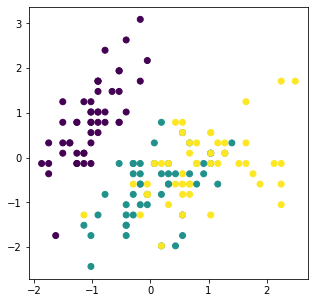

In [14]:
# plot first and second features
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

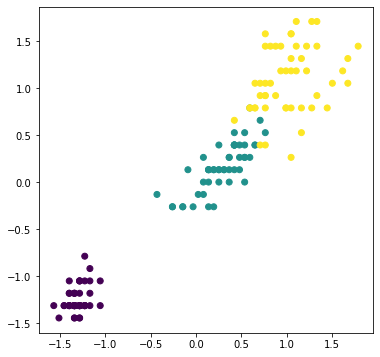

In [8]:
# plot second and third features
plt.figure(figsize=(6,6))
plt.scatter(X[:, 2], X[:, 3], label='class 0', c=y)
plt.show()

In [9]:
# define class LogisticRegression
class LogisticRegression:
    def __init__ (self, method = 'batch', alpha = 0.001):
        self.alpha = alpha
        self.method = method
        self.list_of_used = []
#         print(self.alpha)

# gradient descent
    def gradient_descent(self, X, Y, k, max_iter = 10000):
        batch_size = int(0.1 * X.shape[0])
        self.cost_list = []
        self.iter_list = []
        n = X.shape[1]
        self.W = np.random.rand(n, k)
#         print(self.W.dtype)

# Batch training
        if self.method == "batch":
            start_time = time.time()
            for i in range(max_iter):
                cost, grad =  self.gradient(X, Y)
                self.cost_list.append(cost)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i} is ", cost)
            print(f"time taken: {time.time() - start_time}")
#         if self.method == 'batch':
#             start_time = time.time()
#             for i in range(max_iter):
#                 cost, grad = self.gradient(X, Y)
#                 if i % 500 == 0:
#                     print(f'cost at iteration {i} is ', cost)
#                 self.cost_list.append(cost)
#                 self.iter_list.append(i)
#                 self.W = self.W - self.alpha * grad
#             print(f"time taken: {time.time() - start_time}")
        

#Stochastic training
        elif self.method == 'sto':
            start_time = time.time()
            for i in range(max_iter):
                random_index = np.random.randint(X.shape[0])
                while random_index in self.list_of_used:
                    random_index = np.random.randint(X.shape[0])
                X_sto = X[random_index, :].reshape(1, -1)
                Y_sto = Y[random_index]
                cost, grad = self.gradient(X_sto, Y_sto)
                self.cost_list.append(cost)
                self.iter_list.append(i)
                self.W = self.W - self.alpha * grad
                if (len(self.list_of_used) == X.shape[0]):
                    self.list_of_used = []
                
                if i % 500 == 0:
                    print(f'cost at iteration {i} is ', cost)
                
            print(f"time taken: {time.time() - start_time}")

# Mini batch training                 
        elif self.method == 'mini':
            start_time = time.time()
            for i in range(max_iter):
                shuffle_index = np.random.permutation(X.shape[0])
                X_shuffle = X[shuffle_index]
                Y_shuffle = Y[shuffle_index]
                for j in range(0, X.shape[0], batch_size):
                    X_batch = X_shuffle[j:j+batch_size]
                    Y_batch = Y_shuffle[j:j+batch_size]
                cost, grad = self.gradient(X_batch, Y_batch)
                self.cost_list.append(cost)
                self.iter_list.append(i)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f'cost at iteration {i}', cost)
                
            print(f"time taken: {time.time() - start_time}")
        
# raise error by wrong method input
        else: raise ValueError("method is not matched")
        
#         return self.W, i

# gradient function with cost, grad return
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X)
        cost = -1/m * np.sum(Y * np.log(h))
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad

# yhat
    def h_theta(self, X):
        return self.softmax(X @ self.W)

# softmax function
    def softmax(self, theta_t_x):
        return np.exp(theta_t_x)/ np.sum(np.exp(theta_t_x), axis = 1, keepdims = True)
    
# function for gradient of softmax function
    def softmax_grad(self, X, error):
        return X.T @ error

# define predict function
    def predict(self, X):
        return np.argmax(self.h_theta(X), axis=1)
    
#     def plot(self):
#         plt.plot(self.iter_list, self.cost_list, label = "training loss")
#         plt.xlabel("number of iterations")
#         plt.ylabel("cost")
#         plt.title("Training loss over iterations")
#         plt.legend(loc = "best")
#         plt.show()

# define plot function to plot loss vs iterations
    def plot(self):
        plt.plot(np.arange(len(self.cost_list)) , self.cost_list, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 is  1.1296221612961992
Loss at iteration 500 is  0.14664473114893328
Loss at iteration 1000 is  0.0973196752001488
Loss at iteration 1500 is  0.07656840976189853
Loss at iteration 2000 is  0.06473905923277853
Loss at iteration 2500 is  0.05691269396994929
Loss at iteration 3000 is  0.05126198532713558
Loss at iteration 3500 is  0.04694293277699687
Loss at iteration 4000 is  0.04350731539232819
Loss at iteration 4500 is  0.040692760777586386
Loss at iteration 5000 is  0.03833426628326332
Loss at iteration 5500 is  0.036322203864262326
Loss at iteration 6000 is  0.03458051077652167
Loss at iteration 6500 is  0.033054533646092656
Loss at iteration 7000 is  0.031703855196233
Loss at iteration 7500 is  0.030497857435708525
Loss at iteration 8000 is  0.02941286710489847
Loss at iteration 8500 is  0.028430256608288032
Loss at iteration 9000 is  0.027535143759106276
Loss at iteration 9500 is  0.026715479036140247
time taken: 0.40791821479797363
=========Classification repor

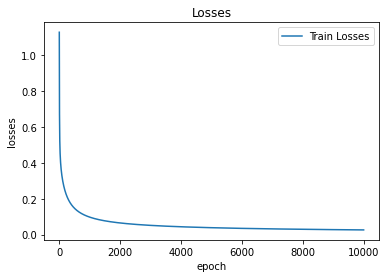

In [10]:
# Batch Gradient descent and its plot
logSR = LogisticRegression(method = 'batch')
logSR.gradient_descent(X_train, y_train_encoded, k)
yhat = logSR.predict(X_test)
logSR.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

cost at iteration 0 1.3793834711189834
cost at iteration 500 0.6242442867666229
cost at iteration 1000 0.24396234204520695
cost at iteration 1500 0.30323118946627897
cost at iteration 2000 0.8589843079292128
cost at iteration 2500 0.3384774564179429
cost at iteration 3000 0.12123951074595596
cost at iteration 3500 0.747828811308027
cost at iteration 4000 0.31753032109466994
cost at iteration 4500 0.3708498766515838
cost at iteration 5000 0.7387385779399519
cost at iteration 5500 0.15865982639190385
cost at iteration 6000 0.09778703617071456
cost at iteration 6500 0.1870027580488341
cost at iteration 7000 0.4365599285310289
cost at iteration 7500 0.587899125983454
cost at iteration 8000 0.1246405394813773
cost at iteration 8500 0.06807467410433109
cost at iteration 9000 0.5924316237070811
cost at iteration 9500 0.5803757610782493
time taken: 0.5226039886474609
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00   

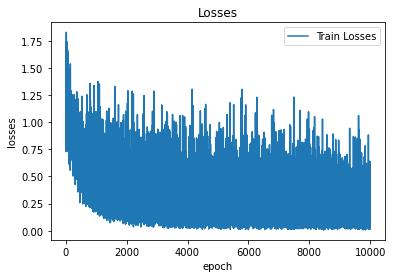

In [11]:
# Mini batch gradient descent and its plot
logSR = LogisticRegression(method = 'mini')
logSR.gradient_descent(X_train, y_train_encoded, k)
yhat = logSR.predict(X_test)
logSR.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

cost at iteration 0 is  1.3738077120136414
cost at iteration 500 is  0.4666468171805514
cost at iteration 1000 is  1.2436969916988168
cost at iteration 1500 is  0.40354568807815777
cost at iteration 2000 is  0.2246350611684749
cost at iteration 2500 is  0.21312411593932146
cost at iteration 3000 is  0.8956181430921731
cost at iteration 3500 is  0.8385973043872594
cost at iteration 4000 is  0.08333084034133735
cost at iteration 4500 is  0.0811477883693262
cost at iteration 5000 is  0.14517651771767365
cost at iteration 5500 is  0.7818067507056993
cost at iteration 6000 is  0.06286077019260622
cost at iteration 6500 is  0.5935868313990299
cost at iteration 7000 is  0.7394033273304318
cost at iteration 7500 is  0.020274582732153747
cost at iteration 8000 is  0.6020804934573406
cost at iteration 8500 is  0.23286922302123533
cost at iteration 9000 is  0.6568249147155614
cost at iteration 9500 is  0.23464477478976906
time taken: 0.329148530960083
=========Classification report=======
Report:

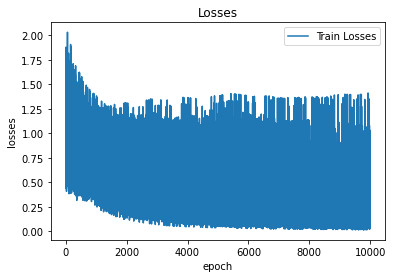

In [12]:
# Stochastic Gradient Descent and its plot
logSR = LogisticRegression(method = 'sto')
logSR.gradient_descent(X_train, y_train_encoded, k)
yhat = logSR.predict(X_test)
logSR.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [13]:
# error method defined
logSR = LogisticRegression(method = 'making error print')
logSR.gradient_descent(X_train, y_train_encoded, k)
yhat = logSR.predict(X_test)
logSR.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

ValueError: method is not matched

In [ ]:
### Discussion
# Batch training is consistent and reach near minimum cost at around 2000 iterations. 
# It took around 4 seconds to finish training with 92% accuracy

# Mini Batch training is less consistent than Batch, it swings around and hard to reach minimum cost with few iterations
# It took around 0.5 seconds which is faster than Batch but less accurate

# Stochastic Gradient Descent is not reliable at all even though it is the fastest training.
# The accuracy is less than 90% and cost hard to reach minimum.